In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df  = pd.read_csv("data/stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [13]:
categorical_features = [features for features in df.columns if df[features].dtype == "O"]
numerical_features = [features for features in df.columns if df[features].dtype != "O"]
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [17]:
df["total_scores"] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_scores'] = df['total_scores']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_scores,average_scores
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


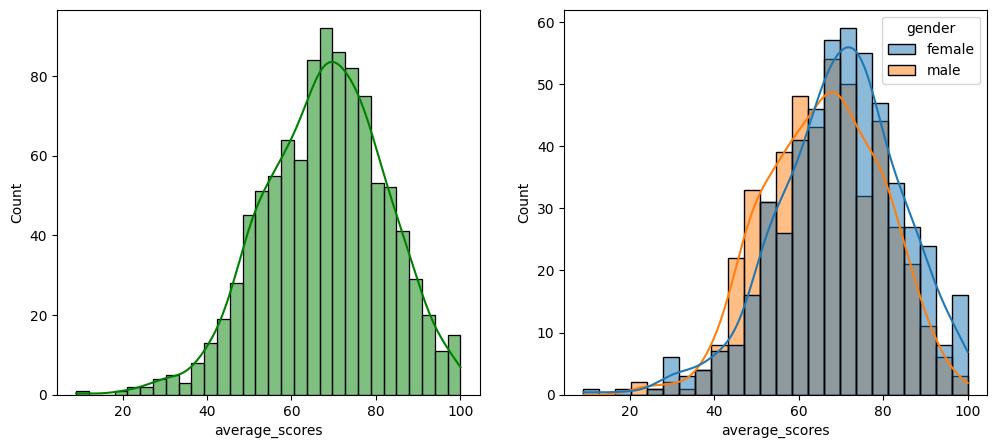

In [20]:
#Histogram and kde

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(121)
sns.histplot(data=df,x='average_scores',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_scores',kde=True,hue='gender')
plt.show()